# **Mission #1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2
import seaborn as sns

###1. EDA수행 (10)

In [34]:
img_dir = 'C:/Users/hoon3/크롤링/이미지/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)

In [35]:
import os
img_dir = 'C:/Users/hoon3/크롤링/이미지/'
categoris = os.listdir(img_dir)
image_total=0
count_list=[]

def folder_image_count(path):
    image_count = os.listdir(path)
    return len(image_count)

for i in range(nb_categoris):
    count=folder_image_count(img_dir+categoris[i])
    print("{0} : {1}개".format(categoris[i],count))
    image_total+=count
    count_list.append(count)
print("클래스의 개수는 {0}개 입니다".format(nb_categoris))
print("전체 데이터 개수는 {0}개 입니다.".format(image_total))

audi : 233개
benz : 376개
bmw : 534개
ferrari : 292개
hyundai : 270개
클래스의 개수는 5개 입니다
전체 데이터 개수는 1705개 입니다.


In [36]:
import math
percent_list=[]
for i in range(nb_categoris):
  percent=count_list[i] / image_total * 100
  percent=round(percent,3)
  percent_list.append(percent)

In [37]:
print(count_list)

[233, 376, 534, 292, 270]


In [38]:
print(categoris)

['audi', 'benz', 'bmw', 'ferrari', 'hyundai']


In [39]:
dataframe=pd.DataFrame({"Category":categoris,
                      "Count": count_list,
                      "Percent": percent_list} )
dataframe.T

,0,1,2,3,4
Category,audi,benz,bmw,ferrari,hyundai
Count,233,376,534,292,270
Percent,13.666,22.053,31.32,17.126,15.836


In [40]:
dataframe.describe()

,Count,Percent
count,5.000000,5.000000
mean,341.000000,20.000200
std,119.979165,7.036966
min,233.000000,13.666000
25%,270.000000,15.836000
50%,292.000000,17.126000
75%,376.000000,22.053000
max,534.000000,31.320000


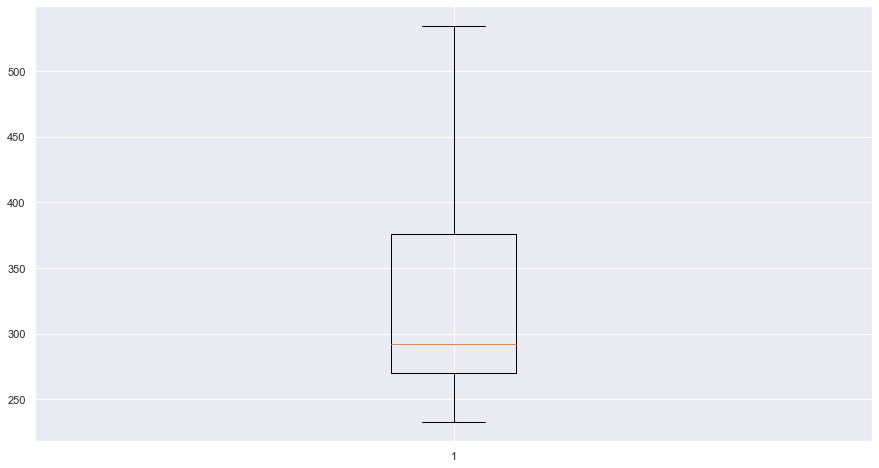

In [41]:
plt.boxplot(count_list)
plt.rcParams['figure.figsize'] = [3, 5]
plt.show()

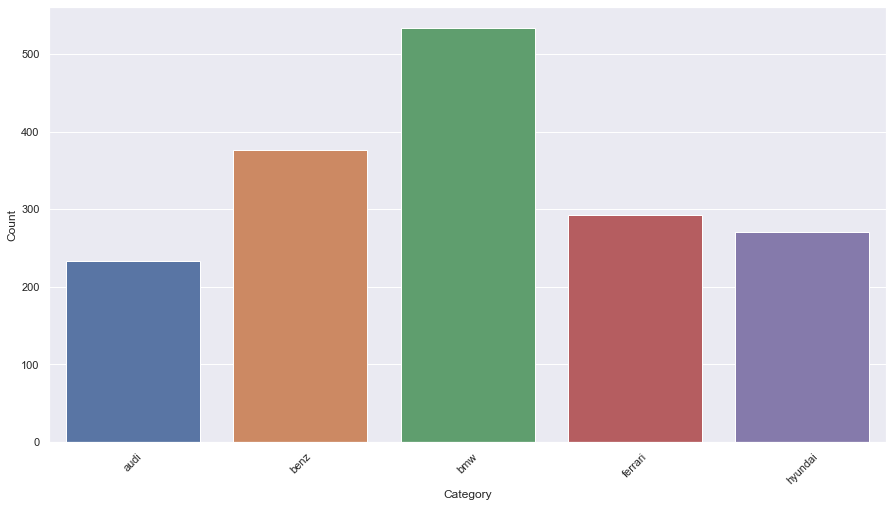

In [42]:
sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(x='Category',y='Count',data=dataframe)
plt.xticks(rotation=45)
plt.show()

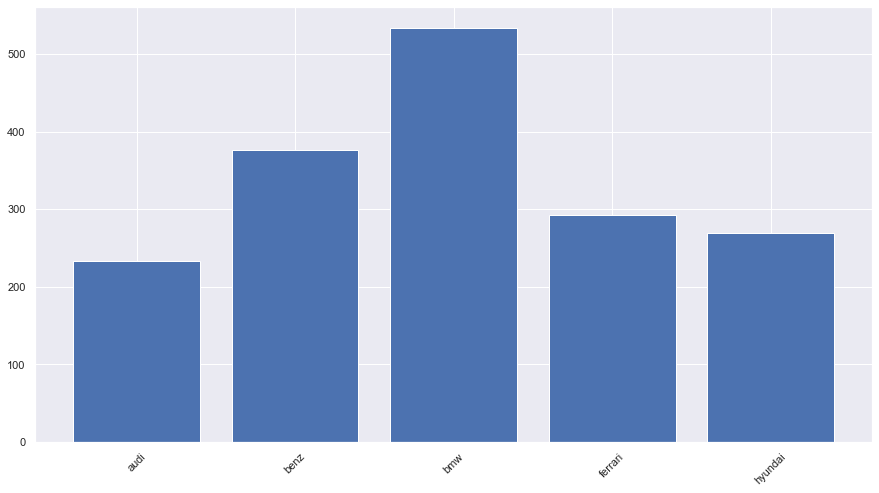

In [43]:
fig= plt.bar(categoris,count_list)
plt.xticks(rotation=45)
plt.show()

### EDA 프로그램 출처
https://github.com/Soongja/basic-image-eda

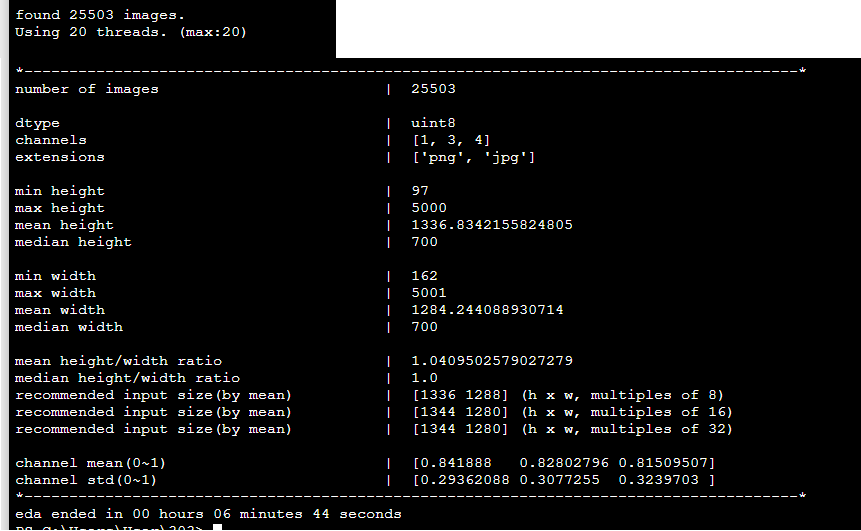

In [44]:
print(os.getcwd())

C:\Users\hoon3\크롤링


In [61]:
import glob
#print(nb_categoris)
img_name_list=[] # 파일명 리스트
channel_list=[]  # 영상 채널 리스트
ext_list=[] # 확장자 리스트
width_list=[] # 영상 데이터 가로 길이
height_list=[] # 영상 데이터 세로 길이
cat_list=[] # 클래스
path_list=[] # 이미지 경로
for i in range(nb_categoris):
  a=glob.glob(img_dir+categoris[i]+'/*')
  for j in range(len(a)):
    cat_img_name= a[j].split('/')[-2:]
    img_name=cat_img_name[-1]
    cat=cat_img_name[0]
    ext=img_name.split('.')[-1]
    #print(cat)
    #print(img_name)
    #print(ext)
    img = cv2.imread(a[j], cv2.IMREAD_UNCHANGED) #cv2.IMREAD_UNCHANGED 해당 옵션이 있어야 채널값이 4인 데이터 분별 가능 
#     if img.ndim ==2: # 흑백 이미지의 경우 채널값이 없는 2차원 배열이므로 조건문처리
#       w, h = img.shape
#       c=1
#     else:
    w, h, c = img.shape
    cat_list.append(cat)
    img_name_list.append(img_name)
    ext_list.append(ext)
    width_list.append(w)
    height_list.append(h)
    channel_list.append(c)
    path_list.append(a[j])

AttributeError: 'NoneType' object has no attribute 'shape'

In [57]:
a[j]

'C:/Users/hoon3/크롤링/이미지/audi\\102아우디.jpg'

In [63]:
img = cv2.imread(a[j], cv2.IMREAD_UNCHANGED)

In [ ]:
# img_info=pd.DataFrame({"IMG_ID":img_name_list,
#                        "Category": cat_list,
#                       "Extension": ext_list,
#                       "Width": width_list,
#                       "Height": height_list,
#                       "Channel": channel_list,
#                        "Path": path_list} )
# img_info

In [ ]:
#img_info.to_csv('./drive/MyDrive/img_info2.csv',index=False)

In [ ]:
img_info=pd.read_csv("./drive/MyDrive/img_info2.csv")

In [ ]:
img_info

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
0,bmctcsqlzotwfhmvrnjo.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnj...,bmctcsqlzotwfhmvrnjo
1,btuixnvjxcztpmutlehv.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/btuixnvjxcztpmutleh...,btuixnvjxcztpmutlehv
2,edkxyljaevluzpccthfb.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/edkxyljaevluzpccthf...,edkxyljaevluzpccthfb
3,iggmyrvxuuodahwxdpcs.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/iggmyrvxuuodahwxdpc...,iggmyrvxuuodahwxdpcs
4,mnplauecvcurkywnpqfa.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/mnplauecvcurkywnpqf...,mnplauecvcurkywnpqfa
...,...,...,...,...,...,...,...,...
25498,xazvpjwaydqrbvpjbvul.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/xazvpjwaydqrbvpjbvu...,xazvpjwaydqrbvpjbvul
25499,dtxfpcggpnrgqolnmdoy.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/dtxfpcggpnrgqolnmdo...,dtxfpcggpnrgqolnmdoy
25500,yifaakzphsggoouohtan.jpg,L2_52,jpg,300,300,3,./drive/MyDrive/data/L2_52/yifaakzphsggoouohta...,yifaakzphsggoouohtan
25501,cpexnivtruoevtlazloq.jpg,L2_52,jpg,2480,3508,3,./drive/MyDrive/data/L2_52/cpexnivtruoevtlazlo...,cpexnivtruoevtlazloq


In [ ]:
img_info2=img_info

img_info2['img']=img_info2.IMG_ID.str.split('.').str[0]
img_info2.head()

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
0,bmctcsqlzotwfhmvrnjo.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnj...,bmctcsqlzotwfhmvrnjo
1,btuixnvjxcztpmutlehv.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/btuixnvjxcztpmutleh...,btuixnvjxcztpmutlehv
2,edkxyljaevluzpccthfb.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/edkxyljaevluzpccthf...,edkxyljaevluzpccthfb
3,iggmyrvxuuodahwxdpcs.jpg,L2_10,jpg,300,300,3,./drive/MyDrive/data/L2_10/iggmyrvxuuodahwxdpc...,iggmyrvxuuodahwxdpcs
4,mnplauecvcurkywnpqfa.jpg,L2_10,jpg,700,700,3,./drive/MyDrive/data/L2_10/mnplauecvcurkywnpqf...,mnplauecvcurkywnpqfa


In [ ]:
len(img_info.IMG_ID.unique())

25503

In [ ]:
img_info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25503 entries, 0 to 25502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMG_ID     25503 non-null  object
 1   Category   25503 non-null  object
 2   Extension  25503 non-null  object
 3   Width      25503 non-null  int64 
 4   Height     25503 non-null  int64 
 5   Channel    25503 non-null  int64 
 6   Path       25503 non-null  object
 7   img        25503 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


In [ ]:
#중복이미지 확인
img_info2.drop_duplicates(['img'],inplace=True)
img_info2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25503 entries, 0 to 25502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IMG_ID     25503 non-null  object
 1   Category   25503 non-null  object
 2   Extension  25503 non-null  object
 3   Width      25503 non-null  int64 
 4   Height     25503 non-null  int64 
 5   Channel    25503 non-null  int64 
 6   Path       25503 non-null  object
 7   img        25503 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


./drive/MyDrive/data/L2_10/bmctcsqlzotwfhmvrnjo.jpg


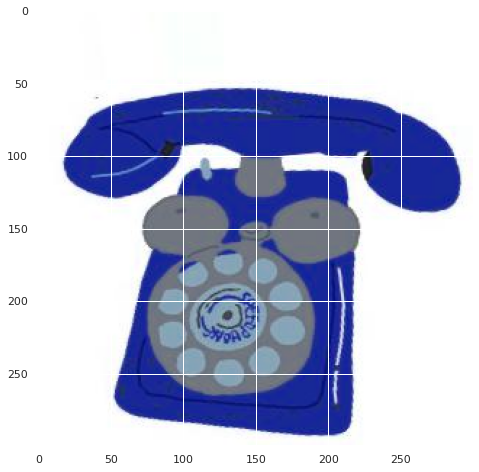

In [ ]:
path=img_info.Path[0]
print(path)
test=cv2.imread(path)
plt.imshow(test)

In [ ]:
img_info.Channel.unique()

array([3, 4, 1])

In [ ]:
#결측값
img_info.isnull().sum()

IMG_ID       0
Category     0
Extension    0
Width        0
Height       0
Channel      0
Path         0
img          0
dtype: int64

In [ ]:
# 클래스 별 데이터 개수 및 평균
print(img_info.groupby("Category")["IMG_ID"].count())
print('\n')
print(img_info.groupby("Category")["IMG_ID"].count().mean())

Category
L2_10    1893
L2_12     518
L2_15    1509
L2_20     410
L2_21     410
L2_24     782
L2_25    6189
L2_27     426
L2_3      595
L2_30     364
L2_33    6206
L2_34     419
L2_39     454
L2_40     180
L2_41     593
L2_44     547
L2_45     631
L2_46    2214
L2_50     781
L2_52     382
Name: IMG_ID, dtype: int64


1275.15


In [ ]:
img_info[img_info.Channel==1]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
4965,tymqqdoygnolomnkjkph.jpg,L2_24,jpg,3508,2480,1,./drive/MyDrive/data/L2_24/tymqqdoygnolomnkjkp...,tymqqdoygnolomnkjkph
12925,ztkcyprbncgkluufgxxh.jpg,L2_30,jpg,3508,2480,1,./drive/MyDrive/data/L2_30/ztkcyprbncgkluufgxx...,ztkcyprbncgkluufgxxh
12951,sejkpoipoqtssdispyqq.jpg,L2_30,jpg,3508,2480,1,./drive/MyDrive/data/L2_30/sejkpoipoqtssdispyq...,sejkpoipoqtssdispyqq
21510,qowbaduogreoqlqgkzsc.jpg,L2_45,jpg,3508,2480,1,./drive/MyDrive/data/L2_45/qowbaduogreoqlqgkzs...,qowbaduogreoqlqgkzsc
21596,oitkkvuasrrheybiwgfw.jpg,L2_45,jpg,2480,3508,1,./drive/MyDrive/data/L2_45/oitkkvuasrrheybiwgf...,oitkkvuasrrheybiwgfw
21597,yudjtlslwipvblwncold.jpg,L2_45,jpg,3508,2480,1,./drive/MyDrive/data/L2_45/yudjtlslwipvblwncol...,yudjtlslwipvblwncold


In [ ]:
img_info[img_info.Channel==4]

,IMG_ID,Category,Extension,Width,Height,Channel,Path,img
1003,lqemgjlhgrhxvcjaaosl.png,L2_10,png,300,300,4,./drive/MyDrive/data/L2_10/lqemgjlhgrhxvcjaaos...,lqemgjlhgrhxvcjaaosl
1006,kktuzbhlvgnwferqiiex.png,L2_10,png,300,300,4,./drive/MyDrive/data/L2_10/kktuzbhlvgnwferqiie...,kktuzbhlvgnwferqiiex
1009,ehlcplifvjivgrvpdscq.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/ehlcplifvjivgrvpdsc...,ehlcplifvjivgrvpdscq
1015,qzidvnlijkajswudeibk.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/qzidvnlijkajswudeib...,qzidvnlijkajswudeibk
1022,zagdtzxkiofygvapxlnk.png,L2_10,png,700,700,4,./drive/MyDrive/data/L2_10/zagdtzxkiofygvapxln...,zagdtzxkiofygvapxlnk
...,...,...,...,...,...,...,...,...
25492,kgylmsktwdpvjipuxcjy.png,L2_52,png,300,300,4,./drive/MyDrive/data/L2_52/kgylmsktwdpvjipuxcj...,kgylmsktwdpvjipuxcjy
25495,dpngxxqgngecscrgtrdl.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/dpngxxqgngecscrgtrd...,dpngxxqgngecscrgtrdl
25498,xazvpjwaydqrbvpjbvul.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/xazvpjwaydqrbvpjbvu...,xazvpjwaydqrbvpjbvul
25499,dtxfpcggpnrgqolnmdoy.png,L2_52,png,700,700,4,./drive/MyDrive/data/L2_52/dtxfpcggpnrgqolnmdo...,dtxfpcggpnrgqolnmdoy


In [ ]:
path=img_info.Path[1003]
print(path)
test=cv2.imread(path)
test.shape
#plt.imshow(test)

./drive/MyDrive/data/L2_10/lqemgjlhgrhxvcjaaosl.png


(300, 300, 3)

In [ ]:
# 클래스 수
#print(img_info.Category.unique())
print("클래스 => {0}개".format(len(img_info.Category.unique())))
print("*"*30)
# 채널 개수
print("1 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==1].count()))
print("3 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==3].count()))
print("4 Channel : {0} 개".format(img_info.IMG_ID[img_info.Channel==4].count()))
print("*"*30)
# 확장자
print("파일 확장자 => {0}".format(img_info.Extension.unique()))
print("JPG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='jpg'].count()))
print("PNG FIle : {0} 개".format(img_info.IMG_ID[img_info.Extension=='png'].count()))
print("*"*30)
# 영상데이터 크기
print("이미지 크기 Min,Max")
print("Max Width : {0}".format(img_info.Width.max()))
print("Min Width : {0}".format(img_info.Width.min()))
print("Max Height : {0}".format(img_info.Height.max()))
print("Min Height : {0}".format(img_info.Height.min()))

클래스 => 20개
******************************
1 Channel : 6 개
3 Channel : 24360 개
4 Channel : 1137 개
******************************
파일 확장자 => ['jpg' 'png']
JPG FIle : 23992 개
PNG FIle : 1511 개
******************************
이미지 크기 Min,Max
Max Width : 5000
Min Width : 97
Max Height : 5001
Min Height : 162


In [ ]:
# L2_10    1893
# > 전화기 / 공유기 
# L2_12     518
# > 네비게이션 / 풍경, 인물사진?
# L2_15    1509
# > 바코드 스캐너 / 자판기(ATM)
# L2_20     410
# > 트로피 / 램프 / 병풍
# L2_21     410
# > 멀티탭 / 사다리 
# L2_24     782
# > 풍경, 인물사진 / 빗 / 마스크 팩
# L2_25    6189
# > 표지판 / 자물쇠 / 열쇠
# L2_27     426
# > 개껌 / 캣타워 / 새둥지
# L2_3      595
# L2_30     364
# L2_33    6206
# L2_34     419
# L2_39     454
# L2_40     180
# L2_41     593
# L2_44     547
# L2_45     631
# L2_46    2214
# L2_50     781
# L2_52     382

##2. 문제점 도출 (10)

1. 데이터 불균형 -> 오버샘플링 , 언더샘플링 필요
>  -> L2_25 , L2_33 클래스가 절반 차지

2. 영상 데이터 차원 1, 3, 4 차원으로 다양함
> 4차원-> RGBA


3. 확장자 png , jpg 두 종류
4. 너비, 높이 Resize 필요

5. 특정 클래스에 불필요한 인물, 풍경사진 포함 -> 일러스트와 사진 이진분류로 사진 삭제-> 2번문제

 영상 색상 경고??
> 해결방안
https://jh-bk.tistory.com/41




image.png

##3. 데이터 분포 문제 해결(10)

1. 데이터 불균형 -> 오버샘플링 , 언더샘플링 필요
>  -> L2_25 , L2_33 클래스가 절반 차지

  > 일정 수치를 기준으로 데이터 작은 클래스는 augmentation 하고 많은 클래스는 랜덤 추출  


2. 영상 데이터 차원 1, 3, 4 차원으로 다양함
> 4차원-> RGBA
 
 **해결방안**
 1차원의 이미지 -> 6개이므로 삭제 /
 4차원의 이미지 -> cv2.COLOR_BGRA2BGR을 통해 3차원으로 변경, cv2.IMREAD_UNCHANGED 옵션 안넣으면 자동으로 3채널로 인식

3. 확장자 png , jpg 두 종류

4. 너비, 높이 Resize 필요 (ex) 32px 64px ~~

### 이미지 Augmentation 후 jpg로 저장하는 코드

In [ ]:
# 학과 서버 환경 실행 코드
# 출처
# https://jeongmin-lee.tistory.com/5
# import numpy as np
# import os
# from os import listdir
# from os.path import isfile, join
# from PIL import Image
# from keras.utils import load_img,img_to_array
 

# np.random.seed(3)
 
# from keras.preprocessing.image import ImageDataGenerator
# img_gen = ImageDataGenerator(
#                                    #rotation_range=30, 
#                                    #shear_range=5.5,  
#                                    # width_shift_range=0.1,
#                                    # height_shift_range=0.1,
#                                    #zoom_range=0.,
#                                    horizontal_flip=True,
#                                    #vertical_flip=True,
#                                    fill_mode='nearest') 
 
# filename_in_dir = [] 
 
# for root, dirs, files in os.walk('./test'): #해당폴더에 있는 이미지 사용 
#     for  fname in files:
#         full_fname = os.path.join(root, fname)
#         filename_in_dir.append(full_fname)
        
# for file_image in filename_in_dir:
#     print(file_image)
#     img = load_img(file_image) 
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
 
#     i = 0
 
#     for batch in img_gen.flow(x,save_to_dir='./test', save_prefix='food', save_format='jpg'): #저장
#         i += 1
#         if i > 5:
#             break
